# A SSIT's Web & Mobile Jobs

This project is to analyse the trends of SSIT(a software development group). This group requested me to analyse and find some insight from their working history. 

They has worked with Canadian clients for several years. They informed me that some parts of data had been eliminated for the security reason.

## Load and clean the data

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

raw_data = pd.read_csv('canada_jobs.csv')
raw_data.head()

,Category,Skill,Genre,Date,Budget
0,iOS,Swift 3,social,3/6/2017,7000.0
1,iOS,Objective-C,social,11/1/2015,4500.0
2,iOS,Objective-C,social,1/3/2017,5000.0
3,iOS,Objective-C,cg,8/1/2017,2600.0
4,iOS,Swift 3,utility,11/1/2017,1000.0


In [97]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
Category    388 non-null object
Skill       390 non-null object
Genre       390 non-null object
Date        390 non-null object
Budget      292 non-null float64
dtypes: float64(1), object(4)
memory usage: 15.3+ KB


There are some to be cleaned: (1) nearly 100 rows has NaN in Budget column, (2) Date column is not a date type but object, (3) some skills in Skills column has different strings for the same thing.

In [98]:
# convert Date column from str to datetime
raw_data['Date'] = pd.to_datetime(raw_data['Date'], format='%m/%d/%Y')

In [99]:
raw_data['Category'] = (raw_data['Category'].str.lower()
                        .str.replace('ios/android', 'mobile')
                        .str.replace('ios', 'mobile')
                        .str.replace('android', 'mobile')
                        .str.replace('mobile/backend', 'mobile')
                        .str.replace('backend for ios app', 'mobile')
                        .str.replace('backend for mobile app', 'mobile')
                        .str.replace('wechat', 'mobile')
                        .str.replace('xamarin', 'web')
                        .str.replace('webapi', 'web')
                        .str.replace('windows desktop', 'windows')
                        .str.replace('windows service', 'windows')
                       )
raw_data['Category'].value_counts()

mobile     212
web        157
windows      9
other        6
macos        4
Name: Category, dtype: int64

In [100]:
raw_data['Skill'] = (raw_data['Skill']
    .str.lower()
    .str.replace('object c', 'objective-c')
    .str.replace('objective c', 'objective-c')
    .str.replace(', ', ',')
    .str.replace('/', ',')
    .str.replace('angular4', 'angular')
    .str.replace('angularjs', 'angular')
    .str.replace('angular cli', 'angular')
    .str.replace('asp .net', 'asp.net')
    .str.replace('asp.net mvc', 'asp.net')
    .str.replace('bpmn-js', 'bpmn.js')
    .str.replace('cake php', 'cakephp')
    .str.replace('cesium.js', 'cesium')
    .str.replace('css3d', 'css')
    .str.replace('css3', 'css')
    .str.replace('fabric js', 'fabric.js')
    .str.replace('html5 game', 'html')
    .str.replace('html5', 'html')
    .str.replace('node.js', 'node')
    .str.replace('node js', 'node')
    .str.replace('react.js', 'react')
    .str.replace('react js', 'react')
    .str.replace('reactjs', 'react')
    .str.replace('ruby on rails', 'ruby')
    .str.replace('ruby germs', 'ruby')
    .str.replace('cesium', 'cesium.js')
    .str.replace('swift 2.3', 'swift')
    .str.replace('swift 3.0', 'swift')
    .str.replace('swift 3', 'swift')
    .str.replace('swift 4.0', 'swift')
    .str.replace('swift 4.2', 'swift')
    .str.replace('swift3', 'swift')
    .str.replace('swift 4', 'swift')
    .str.replace('swift4', 'swift')
    .str.replace('swift2.2', 'swift')
    .str.replace('yii2', 'yii')                     
)
# raw_data['Skill'].value_counts()

## Category chart

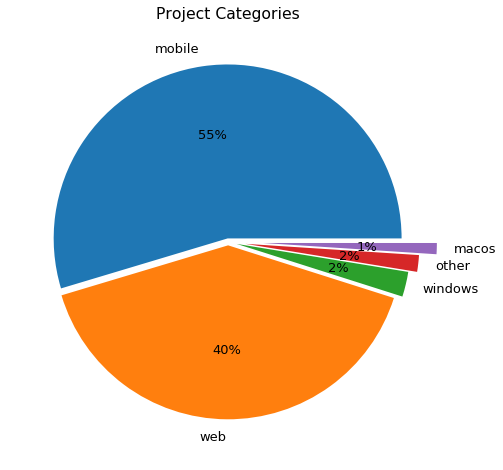

In [101]:
mpl.rcParams["font.size"] = 13
ax = raw_data['Category'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.0f%%', explode=(.02, .02, .05, .1, .2), title='Project Categories')
plt.ylabel('')
plt.show()

###### It shows that 55% of the jobs are mobile app, 40% for web app and 5% for desktop applications. 

## Skills

In [102]:
skills = {}
for skill in raw_data['Skill'].tolist():
    sklist = skill.split(',')
    for s in sklist:
        if s in skills:
            skills[s] += 1
        else:
            skills[s] = 1
skill_series = pd.DataFrame.from_dict(skills, orient='index')

In [103]:
skill_brief = skill_series[skill_series[0] > 10]
skill_brief.loc['others'] = skill_series[skill_series[0] <= 10].sum()

c:\program files\python3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, '')

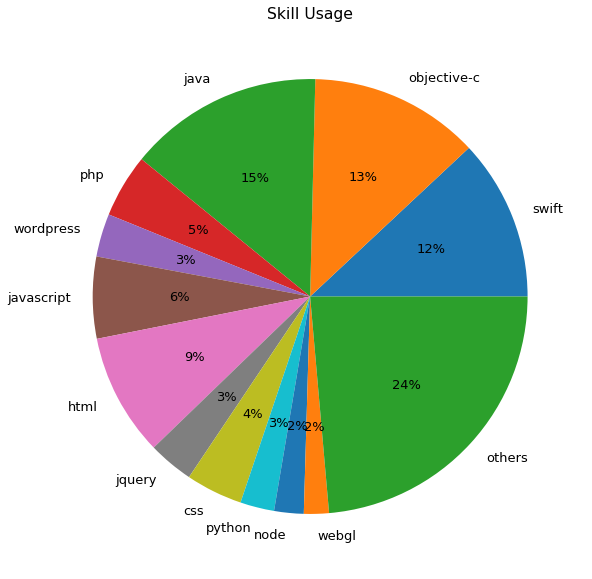

In [104]:
skill_brief.columns = ['Usage']
skill_brief.plot.pie(y='Usage', figsize=(18, 10), autopct='%1.0f%%', legend=False, title='Skill Usage')
plt.ylabel('')

##### This shows that mobile developers need less skills while web developers need more skills.

## Genres

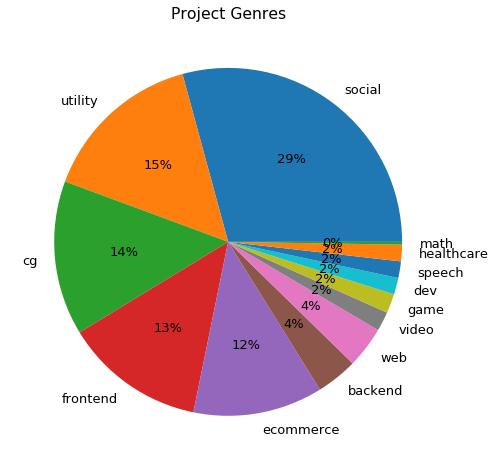

In [105]:
ax = raw_data['Genre'].value_counts().plot.pie(figsize=(8, 8), autopct='%1.0f%%', title='Project Genres')
plt.ylabel('')
plt.show()

##### This team focuses on social, front-end, ecommerce, utility and computer graphics apps.

## Budget Analysis

In [106]:
budget = raw_data.dropna(axis=0)
budget['BigCategory'] = (budget['Category']
                     .str.replace('ios/android', 'mobile')
                     .str.replace('android', 'mobile')
                     .str.replace('ios', 'mobile')
                     )
budget.head()

c:\program files\python3.7\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Category,Skill,Genre,Date,Budget,BigCategory
0,mobile,swift,social,2017-03-06,7000.0,mobile
1,mobile,objective-c,social,2015-11-01,4500.0,mobile
2,mobile,objective-c,social,2017-01-03,5000.0,mobile
3,mobile,objective-c,cg,2017-08-01,2600.0,mobile
4,mobile,swift,utility,2017-11-01,1000.0,mobile


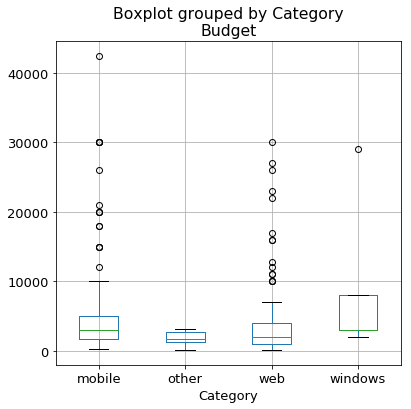

In [107]:
budget.boxplot('Budget', by='Category', figsize=(6, 6))

In [108]:
budget.groupby(by='Category').agg(np.mean)

,Budget
Category,
mobile,4941.776316
other,1833.333333
web,3989.844961
windows,9000.000000


In [109]:
mobile_budgets = budget[budget['Category'] == 'mobile']
web_budgets = budget[budget['Category'] == 'web']

Text(0.5, 1.0, 'Project Price')

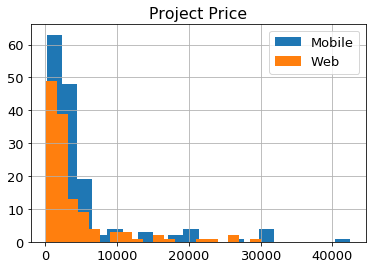

In [120]:
mobile_budgets['Budget'].hist(bins=20, label='Mobile')
web_budgets['Budget'].hist(bins=20, label='Web')
plt.legend(loc=1)
plt.title('Project Price')

#### The box plot and histogram show that mobile projects are a little bit more expensive that web projects, but the difference is not significant.

In [124]:
budget['YearMonth'] = budget['Date'].map(lambda dt: dt.replace(day=1))
budget['Year'] = budget['Date'].map(lambda dt: dt.year)
budget.head()

c:\program files\python3.7\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\program files\python3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Category,Skill,Genre,Date,Budget,BigCategory,YearMonth,Year
0,mobile,swift,social,2017-03-06,7000.0,mobile,2017-03-01,2017
1,mobile,objective-c,social,2015-11-01,4500.0,mobile,2015-11-01,2015
2,mobile,objective-c,social,2017-01-03,5000.0,mobile,2017-01-01,2017
3,mobile,objective-c,cg,2017-08-01,2600.0,mobile,2017-08-01,2017
4,mobile,swift,utility,2017-11-01,1000.0,mobile,2017-11-01,2017


Text(0.5, 1.0, 'Revenue')

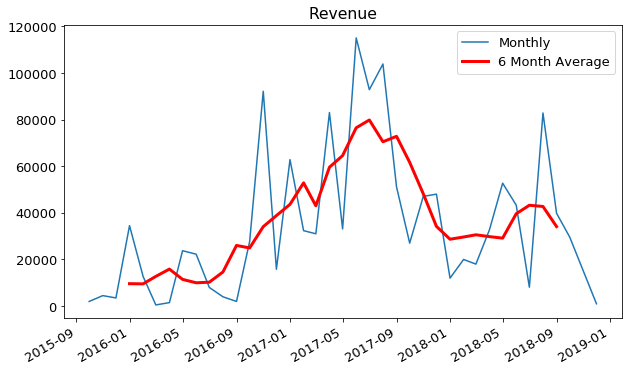

In [126]:
ts = budget.groupby(by='YearMonth').agg({'Budget': 'sum'})
roll = ts.rolling(6, center=True).mean()

ax = ts.plot(y='Budget', label='Monthly', figsize=(10, 6))
roll.plot(y='Budget', label='6 Month Average', color='red',linewidth=3.0, ax=ax)
ax.set_xlabel('')
ax.set_title('Revenue')

#### This result shows that the groups revenue had been increased in 2016 and its peak was 2017, but from 2018 the revenue started to make a descent.

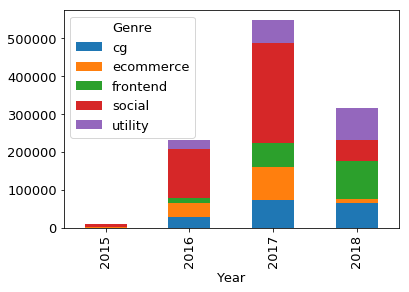

In [127]:
large_genres = ['social', 'utility', 'cg', 'frontend', 'ecommerce']
genre_df = budget[budget['Genre'].isin(large_genres)]
genre_df.groupby(['Year','Genre']).sum()['Budget'].unstack().plot(kind='bar',stacked=True)

##### In 2016 and 2017, social and e-commerce projects are majority of the team, but in 2018 a notable change has happended. Social and e-commerce projects are getting sparse and utility and front-end projects began to be more popular than ever.

## Conclusion

The team has been working for web and mobile applications mainly and some computer graphics minorly.
The revenue of team started to grow in 2016 and took its peak in 2017, and began to make a descent in 2018. It shows that they need some change.